<a href="https://colab.research.google.com/github/anpept/Redes_Neuronales/blob/master/Arte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal convolutiva usando el dataset de imágenes de piezas de Arte.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


drawings  engraving  iconography  painting  sculpture


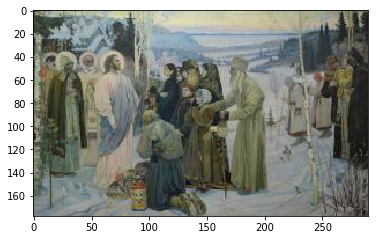

In [0]:
!ls "/content/drive/My Drive/Colab img/dataset/Arte/training_set"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab img/dataset/Arte/training_set/painting/1959.jpg', 'r')
imshow(np.asarray(pil_im))

In [0]:


import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 32

train_data_dir = '/content/drive/My Drive/Colab img/dataset/Arte/training_set'
validation_data_dir = '/content/drive/My Drive/Colab img/dataset/Arte/validation_set'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

Found 7719 images belonging to 5 classes.
Found 798 images belonging to 5 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       73856     
___________________________________________________________

Arriba tiene que aparecer 7719 y 798

In [0]:
epochs = 15

snn = model.fit_generator(
        train_generator,
        steps_per_epoch=242, #total_datos/lote => 7719/32
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=25, #total_datos/lote => 798/32
)

Epoch 1/15
 26/242 [==>...........................] - ETA: 2:05 - loss: 2.0070 - acc: 0.3558

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


166/242 [===================>..........] - ETA: 39s - loss: 1.1968 - acc: 0.5636

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


242/242 [==============================] - 129s 532ms/step - loss: 1.0874 - acc: 0.6030 - val_loss: 0.8576 - val_acc: 0.6729
Epoch 2/15
242/242 [==============================] - 128s 527ms/step - loss: 0.7514 - acc: 0.7285 - val_loss: 0.7135 - val_acc: 0.7143
Epoch 3/15
242/242 [==============================] - 126s 519ms/step - loss: 0.6366 - acc: 0.7719 - val_loss: 0.8598 - val_acc: 0.6867
Epoch 4/15
242/242 [==============================] - 128s 530ms/step - loss: 0.5837 - acc: 0.7952 - val_loss: 0.6832 - val_acc: 0.7494
Epoch 5/15
242/242 [==============================] - 126s 523ms/step - loss: 0.5363 - acc: 0.8030 - val_loss: 0.5555 - val_acc: 0.8020
Epoch 6/15
242/242 [==============================] - 126s 521ms/step - loss: 0.4992 - acc: 0.8195 - val_loss: 0.5665 - val_acc: 0.8045
Epoch 7/15
242/242 [==============================] - 128s 528ms/step - loss: 0.4781 - acc: 0.8248 - val_loss: 0.5508 - val_acc: 0.7995
Epoch 8/15
242/242 [==============================] - 126s 

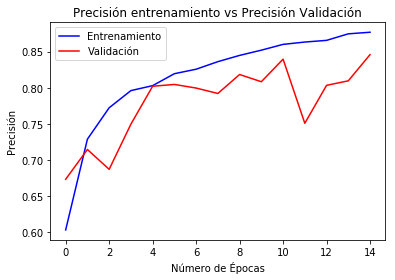

In [0]:
import matplotlib.pyplot as plt
plt.figure(0)  
plt.plot(snn.history['acc'],'b')  
plt.plot(snn.history['val_acc'],'r')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Número de Épocas")  
plt.ylabel("Precisión")  
plt.title("Precisión entrenamiento vs Precisión Validación")  
plt.legend(['Entrenamiento','Validación'])

plt.show()

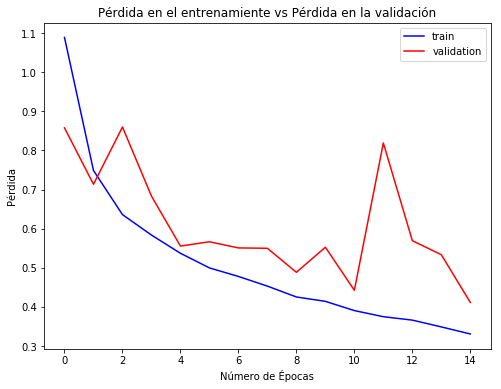

In [0]:
plt.figure(1)  
plt.plot(snn.history['loss'],'b')  
plt.plot(snn.history['val_loss'],'r')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Número de Épocas")  
plt.ylabel("Pérdida")  
plt.title("Pérdida en el entrenamiente vs Pérdida en la validación")  
plt.legend(['train','validation'])

plt.show()

In [0]:
test_data_dir='/content/drive/My Drive/Colab img/dataset/Arte/test_set'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  test_data_dir,
  target_size=(256,256),
  batch_size=15,  
  class_mode='categorical',
  shuffle=False)

test_generator.reset()

predicciones = model.predict_generator(test_generator, verbose=1, steps=1)
predicciones_indices = np.argmax(predicciones,axis=1)

etiquetas = (test_generator.class_indices)
etiquetas = dict((v,k) for k,v in etiquetas.items())
predicciones_etiquetas=[etiquetas[k] for k in predicciones_indices]


Found 15 images belonging to 5 classes.
1/1 [==============================] - 0s 77ms/step


In [0]:
predicciones_etiquetas

['sculpture',
 'drawings',
 'drawings',
 'sculpture',
 'engraving',
 'engraving',
 'iconography',
 'iconography',
 'iconography',
 'painting',
 'iconography',
 'painting',
 'sculpture',
 'sculpture',
 'sculpture']